In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl
import quantum as qm

In [2]:
def mean_and_std(data):
    trials = len(data)
    mean   = np.mean(data, axis=0)
    std    = np.std(data, axis=0)/np.sqrt(trials-1)
    return mean, std
def chop(a, warn = True):
    A = np.round(np.real(a),3)
    if np.all(np.isclose(A.astype(int), A)): return A.astype(int)
    else: return A

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

### Get Data

In [3]:
L = 13
end = 30
n = 3
stop = n*end

here = True
pauli = True
Azero = True
Aplus = False
Amult = False
field_strength = .35
dot_strength = 0

prefix = "data/weights_L"+str(L)+"end"+str(end)+"n"+str(n)+"_"+str(int(here))+ \
         str(int(pauli))+"_"+str(int(Azero))+str(int(Aplus))+str(int(Amult))+ \
         "_f"+str(field_strength)+"d"+str(dot_strength)+"#"
fnames = glob.glob(prefix + "*.npy")
# fnames = fnames[4:5]

In [4]:
trials = len(fnames)
weights = np.zeros((trials, 2, L,   end*n))
peakses = np.zeros((trials, 2, L))
halfses = np.zeros((trials, 2, L))


for idx, fname in enumerate(fnames):
    _, _, weightfore, weightback = np.load(fname) # Other data are otocs
    
    for i in range(L):
        data = weightfore[i]
        for jdx, val in enumerate(data):
            if (jdx == 0): continue
            if (val > data[jdx+1]): peakses[idx,0,i] = jdx; break
            if (jdx == stop-2): peakses[idx,0,i] = stop-1; print("Reached cutoff", i); break
        if (peakses[idx,0,i]==0): halfses[idx,0,i]=0
        peak = data[(int)(peakses[idx,0,i])]
        for jdx, val in enumerate(data):
            if (val>peak/2): halfses[idx,0,i] = jdx; break
        weights[idx,0,i] = data
        
        data = weightback[i]
        for jdx, val in enumerate(data):
            if (jdx == 0): continue
            if (val > data[jdx+1]): peakses[idx,1,i] = jdx; break
            if (jdx == stop-2): peakses[idx,1,i] = stop-1; print("Reached cutoff", i); break
        if (peakses[idx,1,i]==0): halfses[idx,1,i]=0
        peak = data[(int)(peakses[idx,1,i])]
        for jdx, val in enumerate(data):
            if (val>peak/2): halfses[idx,1,i] = jdx; break
        weights[idx,1,i] = data

Reached cutoff 0
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 1
Reached cutoff 11
Reached cutoff 12
Reached cutoff 0
Reached cutoff 11
Reached cutoff 12

### At Sites

Reached cutoff 11
Reached cutoff 12


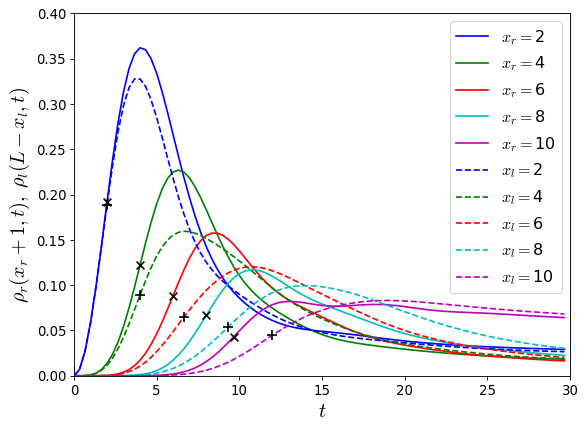

In [11]:
avg_weight, std_weight = mean_and_std(weights)

stop = n*end
peaks = np.zeros((2,L))
halfs = np.zeros((2,L))
ax = plt.subplot(111)
for i in range(L):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (jdx == 0): continue
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == stop-2): peaks[0,i] = stop-1; print("Reached cutoff", i); break
    peaks[0,0] = 0
    if (peaks[0,i]==0): halfs[0,i]=0
    peak = data[(int)(peaks[0,i])]
    for jdx, val in enumerate(data):
        if (val>peak/2): halfs[0,i] = jdx; break
    if (i%2==0 and i < 12 and i>1): 
#     if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = "$x_r=$"+str(i))
        ax.scatter(halfs[0,i]/n, data[(int)(halfs[0,i])], marker='x', c='k', zorder=20, s = 7**2)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
# ax.legend(bbox_to_anchor=(1, 1), loc=2)
ax.legend(loc=1)
plt.ylim(0,.5)
plt.xlim(0,end)
plt.ylabel('Right Weight')
plt.xlabel('Time')
# plt.title('Weight at Site, With Disorder')
# plt.savefig('figures/avgRweightL13_s.pdf')
# plt.show()

plt.gca().set_prop_cycle(None)

# ax = plt.subplot(111)
for i in np.arange(L)[::-1]:
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == stop-2): peaks[1,i] = stop-1; break
    peaks[1,L-2]=0
    if (peaks[1,i]==0): halfs[1,i]=0
    peak = data[(int)(peaks[1,i])]
    for jdx, val in enumerate(data):
        if (val>peak/2): halfs[1,i] = jdx; break
    if (i%2==0 and i>0 and i<12): 
#     if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], "--", label = "$x_l=$"+str(L-1-i))
        ax.scatter(halfs[1,i]/n, data[(int)(halfs[1,i])], marker='+', c='k', zorder=20, s = 9**2)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc=1)
plt.ylim(0,.4)
plt.xlim(0,end)
plt.ylabel(r'$\rho_r(x_r+1,t),\; \rho_l(L-x_l,t)$', fontsize=18)
plt.xlabel('$t$', fontsize=18)
# plt.title('Weight at Site, With Disorder')
# plt.savefig('figures/avgLweightL13_s.pdf')
plt.show()

In [ ]:
plt.plot(range(L),peaks[0]/n, 'o-', label="Forward")
plt.plot(range(L),peaks[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.title("Average Weights First")
# plt.savefig('figures/avgPeaksL13_1s.pdf')
plt.show()

plt.plot(range(L),halfs[0]/n, 'o-', label="Forward")
plt.plot(range(L),halfs[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.legend(loc=4)
plt.title("Average Weights First")
# plt.savefig('figures/avgPeaksL13_1s.pdf')
plt.show()

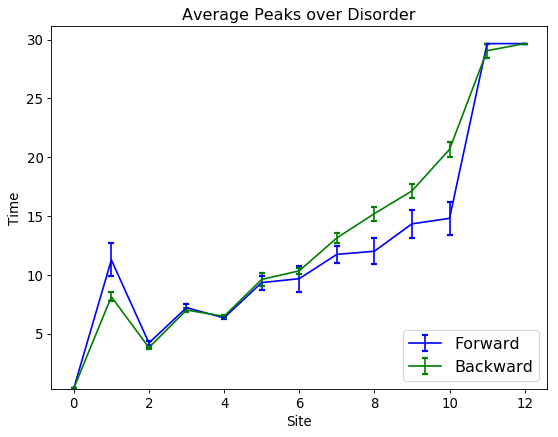

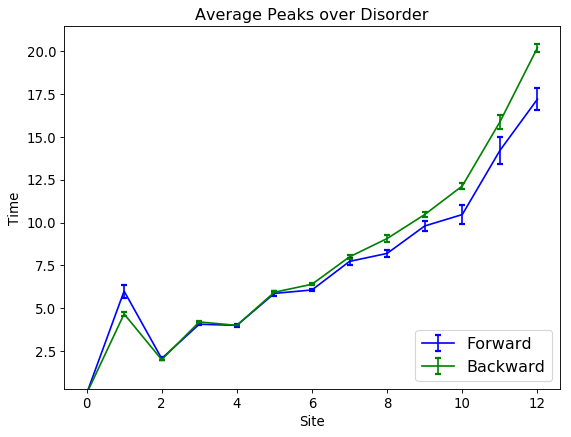

In [36]:
avg_peaks, std_peaks = mean_and_std(peakses)
plt.errorbar(range(L),avg_peaks[0]/n, yerr=std_peaks[0]/n, capthick=2, label="Forward")
plt.errorbar(range(L),avg_peaks[1][::-1]/n, yerr=std_peaks[1][::-1]/n, capthick=2, label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.ylim(0.3)
plt.legend(loc=4)
# plt.savefig('figures/avgPeaksL13_2s.pdf')
plt.title('Average Peaks over Disorder')
plt.show()

avg_halfs, std_halfs = mean_and_std(halfses)
plt.errorbar(range(L),avg_halfs[0]/n, yerr=std_halfs[0]/n, capthick=2, label="Forward")
plt.errorbar(range(L),avg_halfs[1][::-1]/n, yerr=std_halfs[1][::-1]/n, capthick=2, label="Backward")
plt.ylabel('Time')
plt.xlabel('Site')
plt.ylim(0.3)
plt.legend(loc=4)
# plt.savefig('figures/avgPeaksL13_2s.pdf')
plt.title('Average Peaks over Disorder')
plt.show()

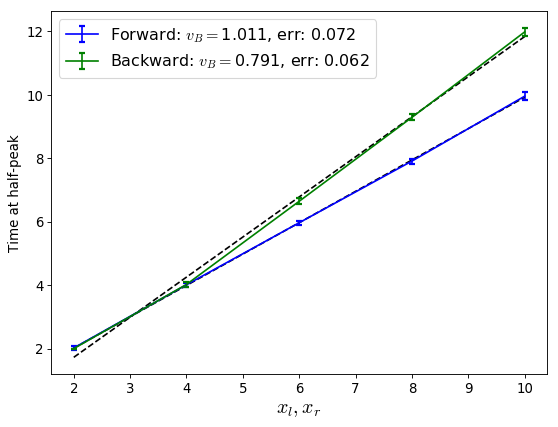

In [10]:
mask = np.arange(2,L-2,2)
fitmask = np.arange(2,L-2,2)
sites = np.arange(L)
x = sites[fitmask]

# avg_peaks, std_peaks = mean_and_std(peakses)
# coeffss_fore = np.zeros((len(peakses),2))
# coeffss_back = np.zeros((len(peakses),2))
# for idx, peaks in enumerate(peakses):
#     y = peaks[0][fitmask]/n
#     coeffss_fore[idx] = np.polyfit(y,x,deg=1)
#     y = peaks[1][::-1][fitmask]/n
#     coeffss_back[idx] = np.polyfit(y,x,deg=1)
# coeffs_fore, errors_fore = mean_and_std(coeffss_fore)
# plt.plot(x+1, (x-coeffs_fore[1])/coeffs_fore[0], 'k--')
# coeffs_back, errors_back = mean_and_std(coeffss_back)
# plt.plot(x+1, (x-coeffs_back[1])/coeffs_back[0], 'k--')
    
# avg_peaks[1] = avg_peaks[1][::-1]
# std_peaks[1] = std_peaks[1][::-1]
# l = "Forward: $v_B=$" + str(qm.chop(coeffs_fore[0])) + ", err: " + str(qm.chop(np.sqrt(errors_fore[0])))
# plt.errorbar(sites[mask]-L//2, avg_peaks[0][mask]/n, yerr=np.sqrt(std_peaks[0][mask])/n, capthick=2, label=l)
# l = "Backward: $v_B=$" + str(qm.chop(coeffs_back[0])) + ", err: " + str(qm.chop(np.sqrt(errors_back[0])))
# plt.errorbar(sites[mask]-L//2, avg_peaks[1][mask]/n, yerr=np.sqrt(std_peaks[1][mask])/n, capthick=2, label=l)
# plt.ylabel('Time at Peak')
# plt.xlabel('Site')
# plt.legend(loc=4)
# # plt.title('Average Peaks over Disorder')
# # plt.savefig('figures/avgPeaksL13_h'+str(field_strength) +'.pdf')
# plt.show()

avg_peaks, std_peaks = mean_and_std(halfses)
coeffss_fore = np.zeros((len(halfses),2))
coeffss_back = np.zeros((len(halfses),2))
for idx, peaks in enumerate(halfses):
    y = peaks[0][fitmask]/n
    coeffss_fore[idx] = np.polyfit(y,x,deg=1)
    y = peaks[1][::-1][fitmask]/n
    coeffss_back[idx] = np.polyfit(y,x,deg=1)
coeffs_fore, errors_fore = mean_and_std(coeffss_fore)
plt.plot(x, (x-coeffs_fore[1])/coeffs_fore[0], 'k--')
coeffs_back, errors_back = mean_and_std(coeffss_back)
plt.plot(x, (x-coeffs_back[1])/coeffs_back[0], 'k--')
    
avg_peaks[1] = avg_peaks[1][::-1]
std_peaks[1] = std_peaks[1][::-1]
l = "Forward: $v_B=$" + str(qm.chop(coeffs_fore[0])) + ", err: " + str(qm.chop(np.sqrt(errors_fore[0])))
plt.errorbar(sites[mask], avg_peaks[0][mask]/n, yerr=np.sqrt(std_peaks[0][mask])/n, capthick=2, label=l)
l = "Backward: $v_B=$" + str(qm.chop(coeffs_back[0])) + ", err: " + str(qm.chop(np.sqrt(errors_back[0])))
plt.errorbar(sites[mask], avg_peaks[1][mask]/n, yerr=np.sqrt(std_peaks[1][mask])/n, capthick=2, label=l)
plt.ylabel('Time at half-peak')
plt.xlabel('$x_l, x_r$', fontsize=18)
plt.legend(loc=2)
# plt.ylim(0,16)
# plt.title('Average Peaks over Disorder')
# plt.savefig('figures/avgHalfsL13_h'+str(field_strength) +'.pdf')
plt.show()

In [27]:
print("fore:", qm.chop(coeffs_fore[0]), ", err:", qm.chop(np.sqrt(errors_fore[0])))
print("back:", qm.chop(coeffs_back[0]), ", err:", qm.chop(np.sqrt(errors_back[0])))

fore: 1.106 , err: 0.085
back: 0.958 , err: 0.078


### At Bonds

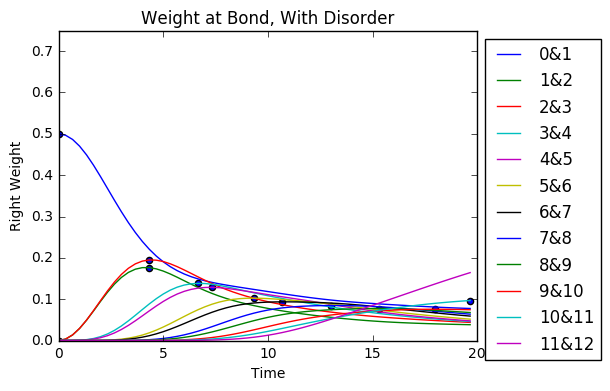

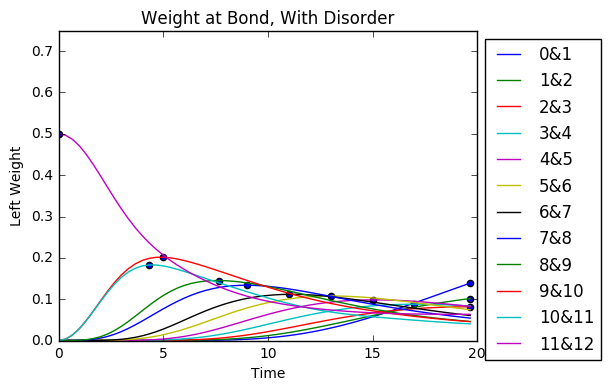

In [13]:
avg_weight, std_weight = mean_and_std(weights_bond)

stop = n*end
peaks = np.zeros((2,L-1))
ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[0,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[0,i] = jdx; break
        if (jdx == 58): peaks[0,i] = 59; break
    peaks[0,0] = 0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[0,i]/n, data[(int)(peaks[0,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,end)
plt.ylabel('Right Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/avgRweightL13_b.pdf')
plt.show()

ax = plt.subplot(111)
for i in range(L-1):
    data = avg_weight[1,i]
    for jdx, val in enumerate(data):
        if (val > data[jdx+1]): peaks[1,i] = jdx; break
        if (jdx == 58): peaks[1,i] = 59; break
    peaks[1,L-2]=0
    if (i%1==0): 
        ax.plot(np.arange(stop)/n,data[:stop], label = str(i)+'&'+str(i+1))
        ax.scatter(peaks[1,i]/n, data[(int)(peaks[1,i])])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylim(0,.75)
plt.xlim(0,end)
plt.ylabel('Left Weight')
plt.xlabel('Time')
plt.title('Weight at Bond, With Disorder')
# plt.savefig('figures/avgLweightL13_b.pdf')
plt.show()

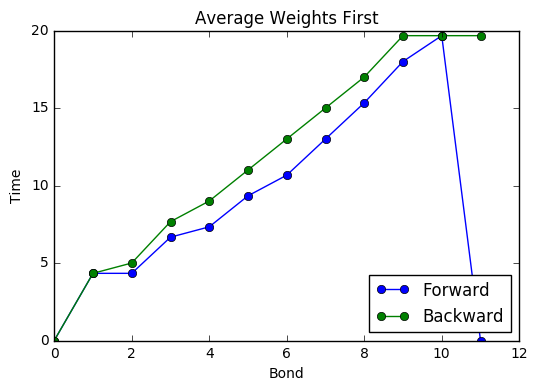

In [14]:
plt.plot(range(L-1),peaks[0]/n, 'o-', label="Forward")
plt.plot(range(L-1),peaks[1][::-1]/n, 'o-', label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
plt.title("Average Weights First")
# plt.savefig('figures/avgPeaksL13_1b.pdf')
plt.show()

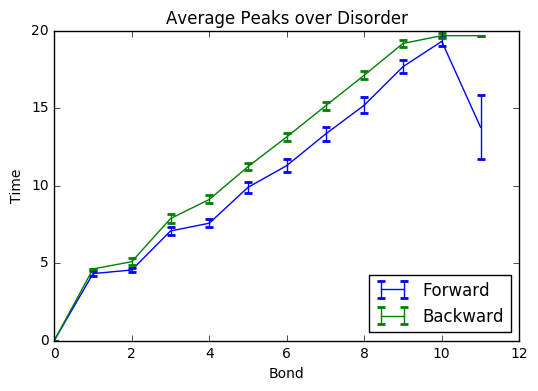

In [15]:
avg_peaks, std_peaks = mean_and_std(peakses_bond)
plt.errorbar(range(L-1),avg_peaks[0]/n, yerr=std_peaks[0]/n, capthick=2, label="Forward")
plt.errorbar(range(L-1),avg_peaks[1][::-1]/n, yerr=std_peaks[1]/n, capthick=2, label="Backward")
plt.ylabel('Time')
plt.xlabel('Bond')
plt.legend(loc=4)
# plt.savefig('figures/avgPeaksL13_2b.pdf')
plt.title('Average Peaks over Disorder')
plt.show()

In [12]:
print(peaks/n)
print(chop(avg_peaks/n))

[[ 0.    0.5   0.55  0.8   0.85  1.05  1.1   1.3   1.4   1.5   1.7   2.95]
 [ 2.95  2.65  1.95  1.7   1.55  1.35  1.15  1.    0.8   0.55  0.5   0.  ]]
[[ 0.     0.5    0.55   0.8    0.862  1.05   1.112  1.3    1.375  1.512
   1.912  2.2  ]
 [ 2.95   2.712  2.     1.75   1.575  1.375  1.162  0.988  0.812  0.55
   0.525  0.   ]]


In [15]:
5//2

2